Welcome DataHacker!
 
Congratulations on your new job! This time you are helping out Unicorn Investors with your data hacking skills. They are considering making an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.
 
You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

Evaluation Metric:
Root Mean Squre Error (RMSE) is the evaluation metric for this contest

Load libraries

In [1]:
import pandas as pd
import numpy as np

Import csv file

In [2]:
# load datasets
df = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Jet-Rail-TS/main/Train_SU63ISt%20-%20Train_SU63ISt.csv', parse_dates=['Datetime'], index_col=['Datetime'])
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Jet-Rail-TS/main/Test_0qrQsBZ%20-%20Test_0qrQsBZ.csv', parse_dates=['Datetime'], index_col=['Datetime'])
sample = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Jet-Rail-TS/main/sample_submission_LSeus50%20-%20sample_submission_LSeus50.csv')


In [3]:
df

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2
...,...,...
2014-09-25 19:00:00,18283,868
2014-09-25 20:00:00,18284,732
2014-09-25 21:00:00,18285,702


In [4]:
test

,ID
Datetime,
2014-09-26 00:00:00,18288
2014-09-26 01:00:00,18289
2014-09-26 02:00:00,18290
2014-09-26 03:00:00,18291
2014-09-26 04:00:00,18292
...,...
2015-04-26 19:00:00,23395
2015-04-26 20:00:00,23396
2015-04-26 21:00:00,23397


In [5]:
sample

,ID,Count
0,18288,0
1,18289,0
2,18290,0
3,18291,0
4,18292,0
...,...,...
5107,23395,0
5108,23396,0
5109,23397,0
5110,23398,0


Visualise time series

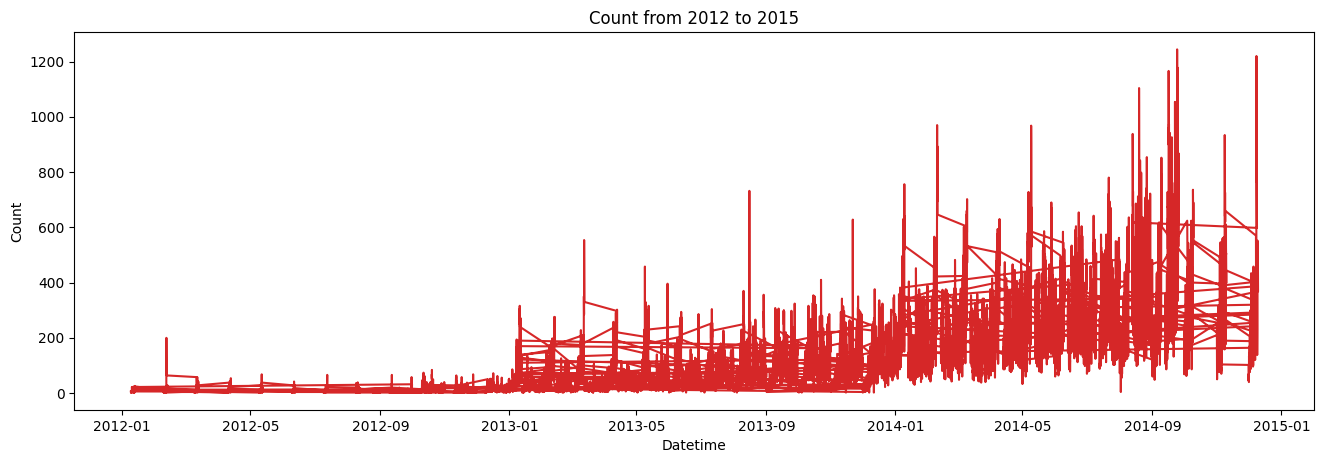

In [6]:
import matplotlib.pyplot as plt

def plot_df(df, x, y, title="", xlabel='Datetime', ylabel='Count', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['Count'], title='Count from 2012 to 2015') 

Show both sides of y axis

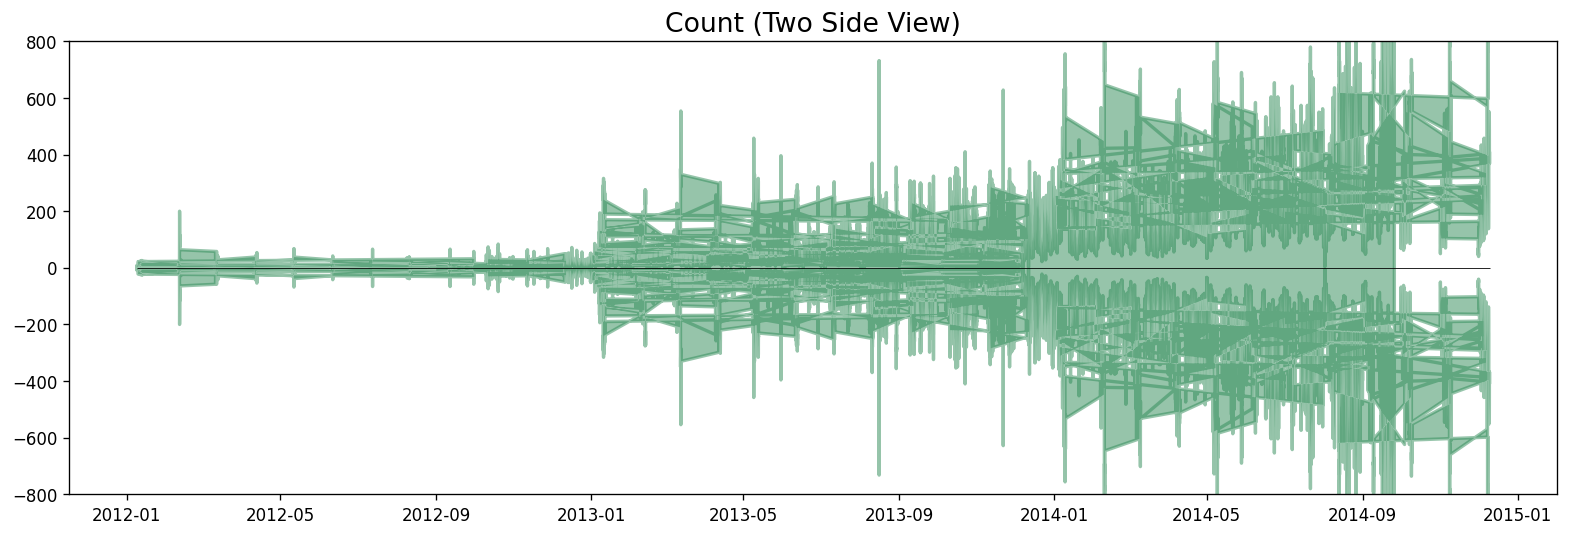

In [7]:
x = df.index.values
y1 = df['Count'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Count (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

Define X and y variables

In [8]:
X = df.index.factorize()[0].reshape(-1,1) 
X_test = test.index.factorize()[0].reshape(-1,1)
y = df['Count'].values

Split dataset for training and testing

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3, random_state=0)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((12801, 1), (12801,), (5487, 1), (5487,), (5112, 1))

Define model

Linear Regression

In [10]:
from sklearn import linear_model

model = linear_model.LinearRegression().fit(X_train, y_train)
print(model.score(X_train, y_train))

0.614630002845828


In [11]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

0.5971016142323239


In [12]:
# Calculating the RMSE of the model
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(y_val, y_pred)) 
print(rms)

97.5120270901068


In [13]:
df_val=pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
0,80,172.926889
1,8,-12.086580
2,270,284.430644
3,12,-50.830952
4,176,313.761771
...,...,...
5482,210,163.877441
5483,2,-56.196956
5484,8,-51.876868
5485,206,222.016736


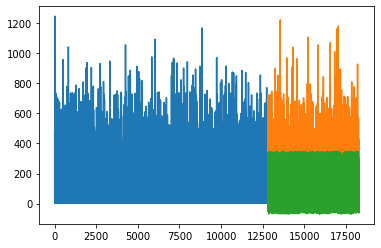

In [14]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()

In [15]:
prediction=model.predict(X_test)
prediction = prediction.astype(int)
prediction

array([-68, -68, -68, ...,  47,  47,  47])

In [16]:
output = pd.DataFrame({'ID': test.ID, 'Count': prediction})
output.to_csv('submission_lr.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [17]:
#upload submission
submission_lr = pd.read_csv("submission_lr.csv")
submission_lr

,ID,Count
0,18288,-68
1,18289,-68
2,18290,-68
3,18291,-68
4,18292,-68
...,...,...
5107,23395,47
5108,23396,47
5109,23397,47
5110,23398,47


Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, random_state=1).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9925227255974183


In [19]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

0.9440639773501499


In [20]:
rms = sqrt(mean_squared_error(y_val, y_pred)) 
print(rms)

36.333414402402184


In [21]:
df_val=pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
0,80,101.938
1,8,10.874
2,270,258.026
3,12,7.318
4,176,231.144
...,...,...
5482,210,171.906
5483,2,2.024
5484,8,8.490
5485,206,245.336


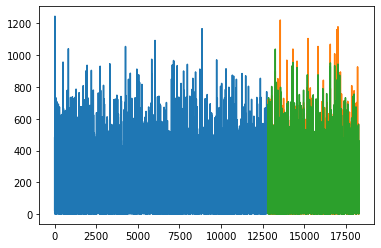

In [22]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()

In [23]:
prediction=model.predict(X_test)
prediction = prediction.astype(int)
prediction

array([ 6,  3,  4, ..., 29, 44, 47])

In [24]:
output = pd.DataFrame({'ID': test.ID, 'Count': prediction})
output.to_csv('submission_rf.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [25]:
#upload submission
submission_rf = pd.read_csv("submission_rf.csv")
submission_rf

,ID,Count
0,18288,6
1,18289,3
2,18290,4
3,18291,2
4,18292,2
...,...,...
5107,23395,26
5108,23396,24
5109,23397,29
5110,23398,44


AdaBoost Regressor

In [26]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(n_estimators=1000, random_state=1).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.6802406681672781


In [27]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

0.6675319841507019


In [28]:
df_val=pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
0,80,179.566891
1,8,20.473600
2,270,334.876763
3,12,20.473600
4,176,345.023429
...,...,...
5482,210,179.566891
5483,2,20.473600
5484,8,20.473600
5485,206,196.174261


In [29]:
rms = sqrt(mean_squared_error(y_val, y_pred)) 
print(rms)

88.57993490354743


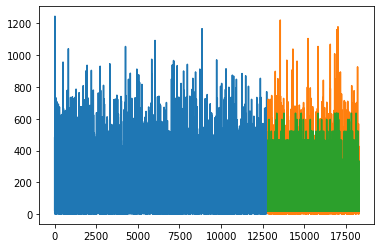

In [30]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()

In [31]:
prediction=model.predict(X_test)
prediction = prediction.astype(int)
prediction

array([20, 20, 20, ..., 20, 20, 20])

In [32]:
output = pd.DataFrame({'ID': test.ID, 'Count': prediction})
output.to_csv('submission_ada.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [33]:
#upload submission
submission_ada = pd.read_csv("submission_ada.csv")
submission_ada

,ID,Count
0,18288,20
1,18289,20
2,18290,20
3,18291,20
4,18292,20
...,...,...
5107,23395,20
5108,23396,20
5109,23397,20
5110,23398,20


Bagging Regressor

In [34]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(n_estimators=1000, random_state=1).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9925223441839622


In [35]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

0.9440638869894681


In [36]:
rms = sqrt(mean_squared_error(y_val, y_pred)) 
print(rms)

36.33344374941882


In [37]:
df_val=pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
0,80,101.938
1,8,10.874
2,270,258.026
3,12,7.318
4,176,231.144
...,...,...
5482,210,171.906
5483,2,2.024
5484,8,8.490
5485,206,245.336


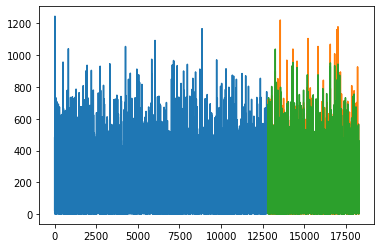

In [38]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()

In [39]:
prediction=model.predict(X_test)
prediction = prediction.astype(int)
prediction

array([ 6,  3,  4, ..., 29, 44, 47])

In [40]:
output = pd.DataFrame({'ID': test.ID, 'Count': prediction})
output.to_csv('submission_bag.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [41]:
#upload submission
submission_bag = pd.read_csv("submission_ada.csv")
submission_bag

,ID,Count
0,18288,20
1,18289,20
2,18290,20
3,18291,20
4,18292,20
...,...,...
5107,23395,20
5108,23396,20
5109,23397,20
5110,23398,20


Polynomial Regression 4th degree

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.6849665594244001


In [43]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

0.6704318327848364


In [44]:
rms = sqrt(mean_squared_error(y_val, y_pred)) 
print(rms)

88.19278341720815


In [45]:
df_val=pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
0,80,136.122725
1,8,5.091190
2,270,286.644988
3,12,10.141838
4,176,362.591200
...,...,...
5482,210,128.196987
5483,2,13.255755
5484,8,10.694853
5485,206,185.681159


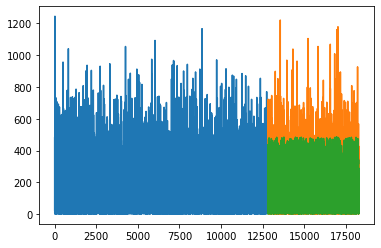

In [46]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()

In [47]:
prediction=model.predict(X_test)
prediction = prediction.astype(int)
prediction

array([22, 22, 22, ..., 34, 35, 35])

In [48]:
output = pd.DataFrame({'ID': test.ID, 'Count': prediction})
output.to_csv('submission_4.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [49]:
#upload submission
submission_4 = pd.read_csv("submission_4.csv")
submission_4

,ID,Count
0,18288,22
1,18289,22
2,18290,22
3,18291,22
4,18292,22
...,...,...
5107,23395,34
5108,23396,34
5109,23397,34
5110,23398,35


Polynomial Regression 10th degree

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 10
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.678917092636314


In [51]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

0.6636682375606352


In [52]:
rms = sqrt(mean_squared_error(y_val, y_pred)) 
print(rms)

89.09315991087836


In [53]:
df_val=pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
0,80,140.733305
1,8,24.772272
2,270,271.524902
3,12,24.731545
4,176,362.495709
...,...,...
5482,210,127.736293
5483,2,24.731531
5484,8,24.731540
5485,206,199.963065


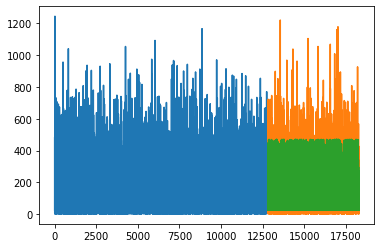

In [54]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()

In [55]:
prediction=model.predict(X_test)
prediction = prediction.astype(int)
prediction

array([24, 24, 24, ..., 28, 28, 28])

In [56]:
output = pd.DataFrame({'ID': test.ID, 'Count': prediction})
output.to_csv('submission_10.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [57]:
#upload submission
submission_10 = pd.read_csv("submission_4.csv")
submission_10

,ID,Count
0,18288,22
1,18289,22
2,18290,22
3,18291,22
4,18292,22
...,...,...
5107,23395,34
5108,23396,34
5109,23397,34
5110,23398,35


Numpy Polyfit

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Jet-Rail-TS/main/Train_SU63ISt%20-%20Train_SU63ISt.csv', parse_dates=['Datetime'])
df

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


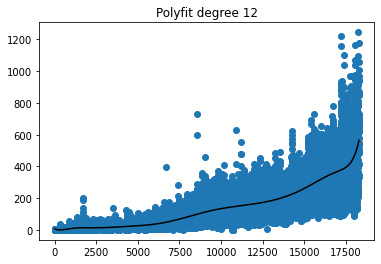

In [59]:
X = df.index
y = df['Count']
degree = 12

coefs = np.polyfit(X, y, degree)

plt.figure()
plt.plot(X, np.polyval(coefs, X),color="black")
plt.title("Polyfit degree " + str(degree))
plt.scatter(X,y)
plt.show()